# Fannie Mae - Technical Challenge

## Part 0: Import libraries

In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Part 1: Get the data

In [40]:
homebuyer_data = pd.read_csv("technica_2022-HomeBuyerInfo.csv")

In [41]:
homebuyer_data

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1451.44,761
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615
...,...,...,...,...,...,...,...,...,...,...
9995,9996,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754
9996,9997,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656
9997,9998,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569
9998,9999,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700


## Part 2: Define Methods for Conditions of Approval

In [42]:
def get_ltv(appraised_value, loan_amount):
    return loan_amount/appraised_value

In [43]:
def get_dti(gross_monthly_income, credit_card_payment, car_payment, student_loan_payment, monthly_mortgage_payment, pmi):
    monthly_debt = credit_card_payment + car_payment + student_loan_payment + monthly_mortgage_payment + pmi
    return monthly_debt/gross_monthly_income

In [44]:
def get_fedti(gross_monthly_income, monthly_mortgage_payment, pmi):
    return (monthly_mortgage_payment+pmi)/gross_monthly_income

In [45]:
def is_buyer_approved(credit_score, dti, fedti, deny_stats):
    is_approved = True
    messages = []
    if credit_score < 640:
        messages.append("Credit Score is less than 640")
        if "credit_score" in deny_stats:
            deny_stats['credit_score'] = deny_stats['credit_score'] + 1
        else:
            deny_stats['credit_score'] = 1
        is_approved = False     
    if dti > 0.43:
        messages.append("DTI ratio is greater than 43%")
        if "dti" in deny_stats:
            deny_stats['dti'] = deny_stats['dti'] + 1
        else:
            deny_stats['dti'] = 1
        is_approved = False
        
    if fedti > 0.28:
        messages.append("FEDTI ratio is greater than 28%")
        if "fedti" in deny_stats:
            deny_stats['fedti'] = deny_stats['fedti'] + 1
        else:
            deny_stats['fedti'] = 1
        is_approved = False
    
    if is_approved:
        messages.append("All conditions met")
        
    return is_approved, messages

## Part 3: Apply Methods to Data

In [46]:
copy = homebuyer_data.copy()

In [47]:
ltv = []
dti = []
fedti = []

for index, row in copy.iterrows():
    ltv_val = get_ltv(row["AppraisedValue"], row["LoanAmount"])
    if ltv_val > 0.8:
        pmi = (0.01 * row["AppraisedValue"])/12
    else:
        pmi = 0
    ltv.append(ltv_val)
    dti.append(get_dti(row["GrossMonthlyIncome"], row["CreditCardPayment"], row["CarPayment"], row["StudentLoanPayments"], row["MonthlyMortgagePayment"], pmi))
    fedti.append(get_fedti(row["GrossMonthlyIncome"], row["MonthlyMortgagePayment"], pmi))

copy["LTV"] = ltv
copy["DTI_Ratio"] = dti
copy["FEDTI_Ratio"] = fedti

In [49]:
copy

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,DTI_Ratio,FEDTI_Ratio
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778,0.88,0.738841,0.435586
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546,0.91,1.194473,0.857283
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736,0.92,0.770734,0.569280
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1451.44,761,0.93,0.326350,0.203549
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615,0.95,1.956473,1.405351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754,0.72,0.641190,0.349667
9996,9997,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656,0.82,0.427636,0.255546
9997,9998,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569,0.80,0.285636,0.183941
9998,9999,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700,0.83,0.403692,0.277851


In [50]:
is_approved = []
messages = []
deny_stats = {}
statuses = {}

for index, row in copy.iterrows():
    status, msg = is_buyer_approved(row["CreditScore"], row["DTI_Ratio"], row["FEDTI_Ratio"], deny_stats)
    if status:
        if "Y" in statuses:
            statuses["Y"] = statuses["Y"] + 1
        else:
            statuses["Y"] = 1
        is_approved.append("Y")
    else:
        if "N" in statuses:
            statuses["N"] = statuses["N"] + 1
        else:
            statuses["N"] = 1
        is_approved.append("N")
    messages.append(msg)
        
copy["Is_Approved"] = is_approved
copy["Message"] = messages

In [51]:
copy

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,DTI_Ratio,FEDTI_Ratio,Is_Approved,Message
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778,0.88,0.738841,0.435586,N,"[DTI ratio is greater than 43%, FEDTI ratio is..."
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546,0.91,1.194473,0.857283,N,"[Credit Score is less than 640, DTI ratio is g..."
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736,0.92,0.770734,0.569280,N,"[DTI ratio is greater than 43%, FEDTI ratio is..."
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1451.44,761,0.93,0.326350,0.203549,Y,[All conditions met]
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615,0.95,1.956473,1.405351,N,"[Credit Score is less than 640, DTI ratio is g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754,0.72,0.641190,0.349667,N,"[DTI ratio is greater than 43%, FEDTI ratio is..."
9996,9997,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656,0.82,0.427636,0.255546,Y,[All conditions met]
9997,9998,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569,0.80,0.285636,0.183941,N,[Credit Score is less than 640]
9998,9999,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700,0.83,0.403692,0.277851,Y,[All conditions met]


In [12]:
deny_stats

{'dti': 6513, 'fedti': 6259, 'credit_score': 4028}

In [13]:
statuses

{'N': 7657, 'Y': 2343}

In [14]:
per_dti = (deny_stats["dti"]/10000)*100
per_fedti = (deny_stats["fedti"]/10000)*100
per_cs = (deny_stats["credit_score"]/10000)*100
per_denied = (statuses["N"]/10000)*100
per_accepted = (statuses["Y"]/10000)*100


print(f"Out of 10,000 homeowners, {per_accepted:.2f}% were accepted and {per_denied:.2f}% were denied.\n")
print(f"Out of 10,000 homeowners, {per_dti:.2f}% were denied because their DTI ratio was greater than 43%, {per_fedti:.2f}% were denied because their FEDTI ratio was greater than 28%, and {per_cs:.2f}% were denied because their credit score was less than 640")

Out of 10,000 homeowners, 23.43% were accepted and 76.57% were denied.

Out of 10,000 homeowners, 65.13% were denied because their DTI ratio was greater than 43%, 62.59% were denied because their FEDTI ratio was greater than 28%, and 40.28% were denied because their credit score was less than 640


## Part 4: Visualize Data

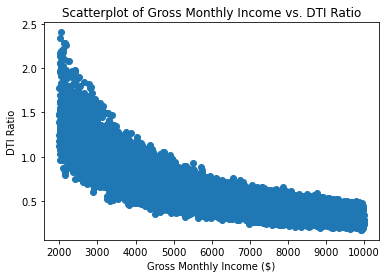

In [28]:
plt.title("Scatterplot of Gross Monthly Income vs. DTI Ratio")
plt.xlabel("Gross Monthly Income ($)")
plt.ylabel("DTI Ratio")

plt.scatter(homebuyer_data["GrossMonthlyIncome"], homebuyer_data["DTI_Ratio"])
plt.show()

In [32]:
deny_stats.values()

dict_values([6513, 6259, 4028])

Text(0.5, 1.0, 'Distribution of Deciding Factors that led to Denial')

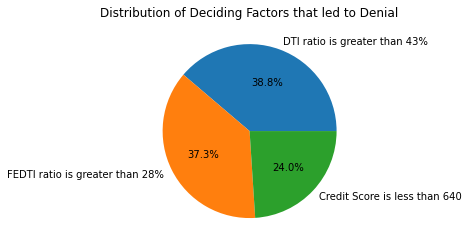

In [36]:
labels = ["DTI ratio is greater than 43%", "FEDTI ratio is greater than 28%", "Credit Score is less than 640"]

plt.pie(deny_stats.values(), labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Deciding Factors that led to Denial")

## Part 5: Apply Machine Learning to Data

In [52]:
x_train, x_test, y_train, y_test = train_test_split(homebuyer_data, copy["Is_Approved"], test_size=0.25, random_state=0)

In [59]:
logisticRegr = LogisticRegression(max_iter=1000)

In [60]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
predictions = logisticRegr.predict(x_test)

In [77]:
type(x_test)

pandas.core.frame.DataFrame

In [74]:
logisticRegr.predict(x_test[0].reshape(-1, 1))

KeyError: 0

In [63]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.928


In [66]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)